In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

from models import LegacySeq2Seq, MixedSeq2Seq, DynamicSeq2Seq
from data_providers import MultiTSDataProvider

%matplotlib inline

In [2]:
n_cond = 30
n_pred = 30
batch_size = 100
num_hidden = 100

# rnn = LegacySeq2Seq(n_cond, n_pred, num_hidden, n_layers=2)
# rnn = MixedSeq2Seq(n_cond, n_pred, num_hidden, n_layers=2)
rnn = DynamicSeq2Seq(n_cond, n_pred, num_hidden, n_layers=2, batch_size=batch_size)

In [ ]:
rnn.restore_session('checkpoints/2017-09-07_22-43-52-30-30/model.ckpt-6.meta')

In [3]:
base_dir = '../data/'
full_df = pd.read_csv(base_dir+'train_1.csv').fillna(0)
X = np.log1p(full_df.drop('Page', axis=1).values)
scaler = StandardScaler()
# discussion on which scaler to use here: https://www.kaggle.com/c/web-traffic-time-series-forecasting/discussion/38274
# each ts should have 0 mean and unit variance
# since the time series are the 'features' being scaled, transpose first
X = scaler.fit_transform(X.T).T
n_ts = None
train_data = MultiTSDataProvider(X,
                                 n_ts=n_ts, 
                                 n_cond=n_cond, 
                                 n_pred=n_pred, 
                                 stride_length=-1,
                                 batch_size=batch_size)
val_data = MultiTSDataProvider(X,
                               n_ts=n_ts,
                               n_cond=n_cond,
                               n_pred=n_pred,
                               which_set='val',
                               batch_size=batch_size)

(145063, 490)
(145063, 30) (145063, 30)
(145063, 60)
(145063, 30) (145063, 30)


In [ ]:
rnn.train(train_data, val_data, epochs=100, keep_prob=0.7, save=False)
# 29.71 for legacy

Elapsed time 368.81648802757263 seconds
End of epoch 1: running error average = 0.421
                     median error average = 0.634
                     val error average = 0.715
Elapsed time 377.5309510231018 seconds
End of epoch 2: running error average = 0.409
                     median error average = 0.634
                     val error average = 0.618


In [21]:
input_batch, target_batch = val_data.next()
# preds = rnn.predict(input_batch, target_batch)

0


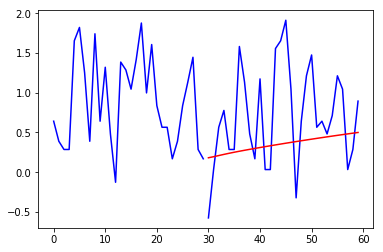

1


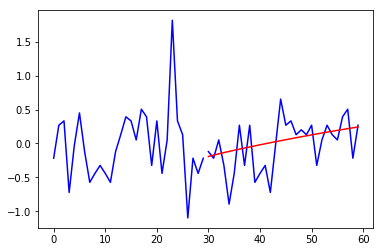

2


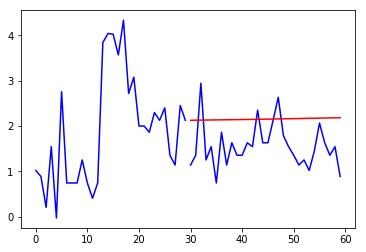

3


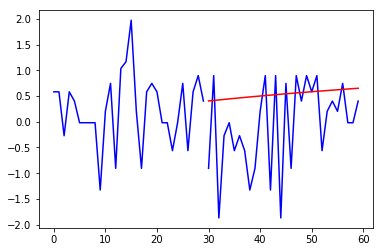

4


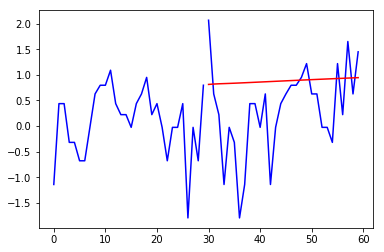

5


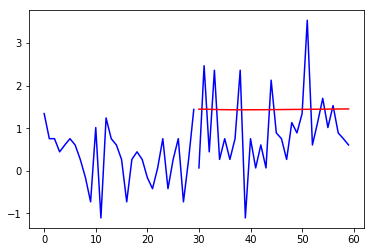

6


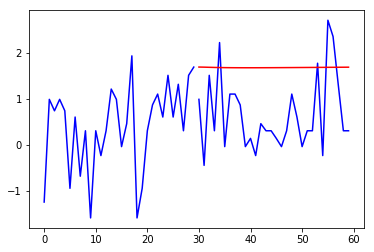

7


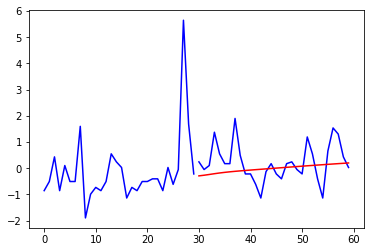

8


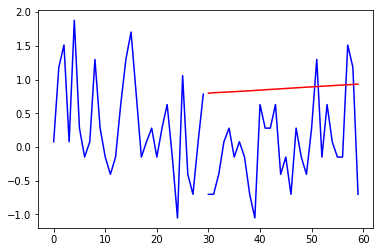

9


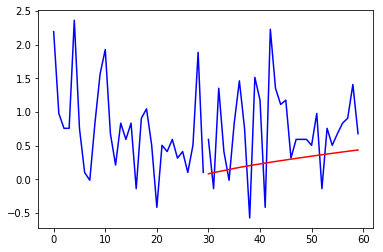

In [22]:
rnn.view_preds(input_batch, target_batch)